# Yahoo!Finance

Getting data from `yahoo!finance`

In [1]:
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib.dates import date2num
from mplfinance.original_flavor import candlestick_ohlc

In [ ]:
msft = yf.Ticker("msft")

# get all stock info
msft.info

In [3]:
# get historical market data
df_hist = msft.history(
    period="1mo",
    interval="1d",
    start="2019-01-01",
    end="2023-01-01",
)

In [4]:
df_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,94.924819,97.022602,94.343160,96.421875,35329300,0.0,0.0
2019-01-03 00:00:00-05:00,95.449263,95.535085,92.683998,92.874710,42579100,0.0,0.0
2019-01-04 00:00:00-05:00,95.086909,97.747283,94.333612,97.194229,44060600,0.0,0.0
2019-01-07 00:00:00-05:00,96.917714,98.471981,96.288382,97.318199,35656100,0.0,0.0
2019-01-08 00:00:00-05:00,98.252674,99.139466,96.984465,98.023827,31514400,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,235.006357,237.753450,232.846502,237.614105,21207000,0.0,0.0
2022-12-27 00:00:00-05:00,237.584243,237.813164,234.727664,235.852386,16688600,0.0,0.0
2022-12-28 00:00:00-05:00,235.782700,238.599474,233.075413,233.433731,17457100,0.0,0.0


In [5]:
# show meta information about the history (requires history() to be called first)
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1690574401,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 338.37,
 'chartPreviousClose': 101.57,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1690531200,
   'end': 1690551000,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1690551000,
   'end': 1690574400,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1690574400,
   'end': 1690588800,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

In [6]:
# show actions (dividends, splits, capital gains)
msft.actions,\
msft.dividends,\
msft.splits,\
msft.capital_gains  # only for mutual funds & etfs

(                           Dividends  Stock Splits
 Date                                              
 2019-02-20 00:00:00-05:00       0.46           0.0
 2019-05-15 00:00:00-04:00       0.46           0.0
 2019-08-14 00:00:00-04:00       0.46           0.0
 2019-11-20 00:00:00-05:00       0.51           0.0
 2020-02-19 00:00:00-05:00       0.51           0.0
 2020-05-20 00:00:00-04:00       0.51           0.0
 2020-08-19 00:00:00-04:00       0.51           0.0
 2020-11-18 00:00:00-05:00       0.56           0.0
 2021-02-17 00:00:00-05:00       0.56           0.0
 2021-05-19 00:00:00-04:00       0.56           0.0
 2021-08-18 00:00:00-04:00       0.56           0.0
 2021-11-17 00:00:00-05:00       0.62           0.0
 2022-02-16 00:00:00-05:00       0.62           0.0
 2022-05-18 00:00:00-04:00       0.62           0.0
 2022-08-17 00:00:00-04:00       0.62           0.0
 2022-11-16 00:00:00-05:00       0.68           0.0,
 Date
 2019-02-20 00:00:00-05:00    0.46
 2019-05-15 00:00:00-0

In [7]:
# show share count
msft.get_shares_full(start="2020-01-01", end="2023-01-01")

2020-01-08 00:00:00-05:00    7725000192
2020-01-09 00:00:00-05:00    7609140224
2020-01-10 00:00:00-05:00    7679649792
2020-01-12 00:00:00-05:00    7628810240
2020-01-13 00:00:00-05:00    7724109824
                                ...    
2022-09-16 00:00:00-04:00    7665780224
2022-09-16 00:00:00-04:00    7457889792
2022-09-17 00:00:00-04:00    7457889792
2022-09-17 00:00:00-04:00    7477389824
2022-10-29 00:00:00-04:00    7454470144
Length: 93, dtype: int64

In [8]:
# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

,2023-06-30,2023-03-31,2022-12-31,2022-09-30,2022-06-30
Free Cash Flow,19827000000.0,17834000000.0,4899000000.0,16915000000.0,17758000000.0
Repurchase Of Capital Stock,-5704000000.0,-5509000000.0,-5459000000.0,-5573000000.0,-8757000000.0
Repayment Of Debt,-1000000000.0,0.0,-750000000.0,-1000000000.0,0.0
Issuance Of Capital Stock,512000000.0,536000000.0,243000000.0,575000000.0,461000000.0
Capital Expenditure,-8943000000.0,-6607000000.0,-6274000000.0,-6283000000.0,-6871000000.0
End Cash Position,34704000000.0,26562000000.0,15646000000.0,22884000000.0,13931000000.0
Beginning Cash Position,26562000000.0,15646000000.0,22884000000.0,13931000000.0,12498000000.0
Effect Of Exchange Rate Changes,-81000000.0,29000000.0,88000000.0,-230000000.0,-198000000.0
Changes In Cash,8223000000.0,10887000000.0,-7326000000.0,9183000000.0,1631000000.0
Financing Cash Flow,-11413000000.0,-10290000000.0,-11349000000.0,-10883000000.0,-13269000000.0


In [9]:
# show holders
msft.major_holders,\
msft.institutional_holders,\
msft.mutualfund_holders

(        0                                      1
 0   0.05%        % of Shares Held by All Insider
 1  73.77%       % of Shares Held by Institutions
 2  73.80%        % of Float Held by Institutions
 3    6159  Number of Institutions Holding Shares,
                               Holder     Shares Date Reported   % Out  \
 0                 Vanguard Group Inc  649544303    2023-03-30  0.0874   
 1                     Blackrock Inc.  537573096    2023-03-30  0.0723   
 2           State Street Corporation  292106885    2023-03-30  0.0393   
 3                           FMR, LLC  200523373    2023-03-30  0.0270   
 4      Price (T.Rowe) Associates Inc  166035734    2023-03-30  0.0223   
 5      Geode Capital Management, LLC  144365760    2023-03-30  0.0194   
 6                     Morgan Stanley  120316895    2023-03-30  0.0162   
 7          JP Morgan Chase & Company   94617741    2023-03-30  0.0127   
 8            Capital World Investors   87608980    2023-03-30  0.0118   
 9  Norge

In [10]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-07-23 06:00:00-04:00,NaN,NaN,NaN
2024-04-23 06:00:00-04:00,NaN,NaN,NaN
2024-01-22 16:00:00-05:00,NaN,NaN,NaN
2024-01-22 05:00:00-05:00,NaN,NaN,NaN
2023-10-23 06:00:00-04:00,2.39,NaN,NaN
2023-07-25 12:00:00-04:00,2.55,2.69,0.0549
2023-04-25 12:00:00-04:00,2.23,2.45,0.0981
2023-01-24 11:00:00-05:00,2.29,2.32,0.0109
2022-10-25 12:00:00-04:00,2.30,2.35,0.0205


In [11]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

'-'

In [12]:
# show options expirations
msft.options

('2023-08-04',
 '2023-08-11',
 '2023-08-18',
 '2023-08-25',
 '2023-09-01',
 '2023-09-15',
 '2023-10-20',
 '2023-11-17',
 '2023-12-15',
 '2024-01-19',
 '2024-02-16',
 '2024-03-15',
 '2024-06-21',
 '2024-09-20',
 '2024-12-20',
 '2025-01-17',
 '2025-06-20',
 '2025-12-19')

In [13]:
# get option chain for specific expiration
opt = msft.option_chain('2023-08-04')
# data available via: opt.calls, opt.puts
type(opt)

yfinance.ticker.Options

In [14]:
# show news
len(msft.news), msft.news[0]

(8,
 {'uuid': '2ff05ce7-cfd0-3c6e-917a-3029bcb65477',
  'title': 'What Are The Best Stocks To Buy Right Now?',
  'publisher': 'Insider Monkey',
  'link': 'https://finance.yahoo.com/news/best-stocks-buy-now-073148215.html',
  'providerPublishTime': 1690615908,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/J4n4sTBVQVKHNNulrxvpPQ--~B/aD02NDA7dz0xMjgwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/2cd9faa410877efc8bf5ac53937c410d',
     'width': 1280,
     'height': 640,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/d8Wmj8h5WkcKr4Z7v7DRpQ--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/2cd9faa410877efc8bf5ac53937c410d',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['^DJI',
   'BRK-B',
   'UBER',
   'MSFT',
   'TMO',
   'UNH',
   'PYPL',
   'MA',
   'BABA',
   'ATVI',
   'V']})

## Plots

### mplfinance

<Figure size 640x480 with 0 Axes>

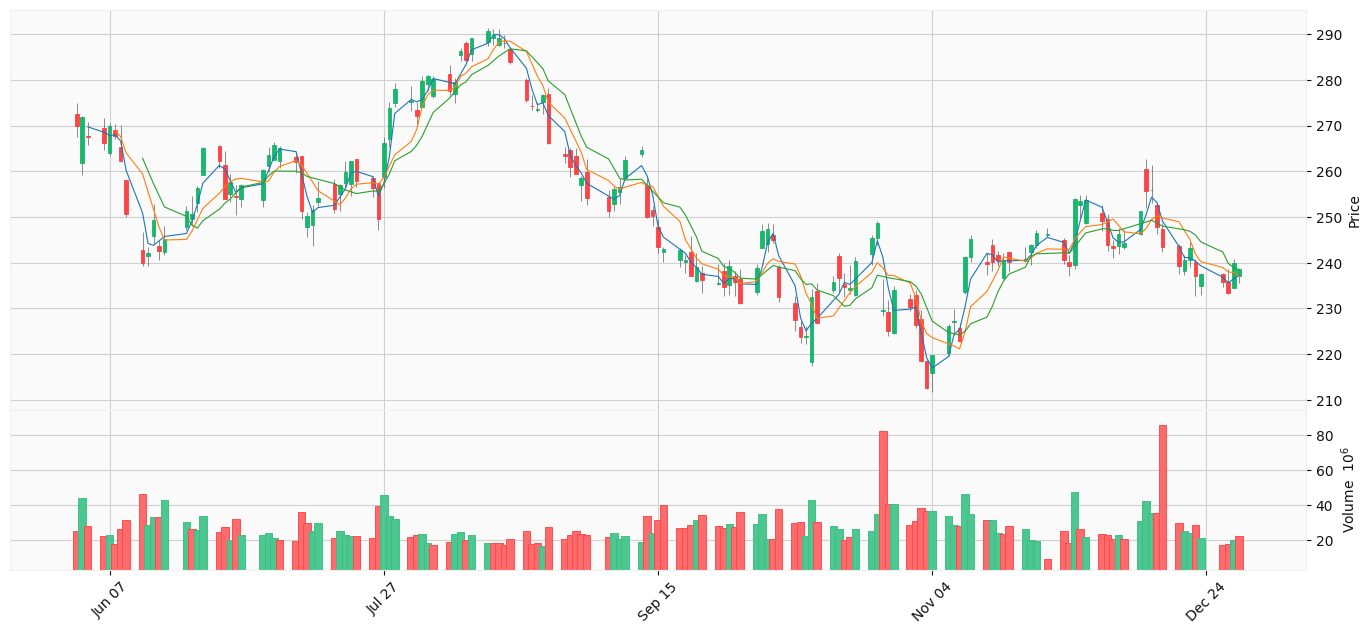

In [17]:
mpf.plot(
    df_hist["2022-06-01":"2023-01-01"],
    type="candle",
    mav=(3, 6, 9),
    volume=True,
    style="yahoo",
    show_nontrading=True,
    figsize=(18, 8),
)

In [4]:
df_part = df_hist.loc["2022-06-01":"2023-01-01", "Open":"Close"].reset_index()
df_part["Date"] = df_part["Date"].map(date2num)

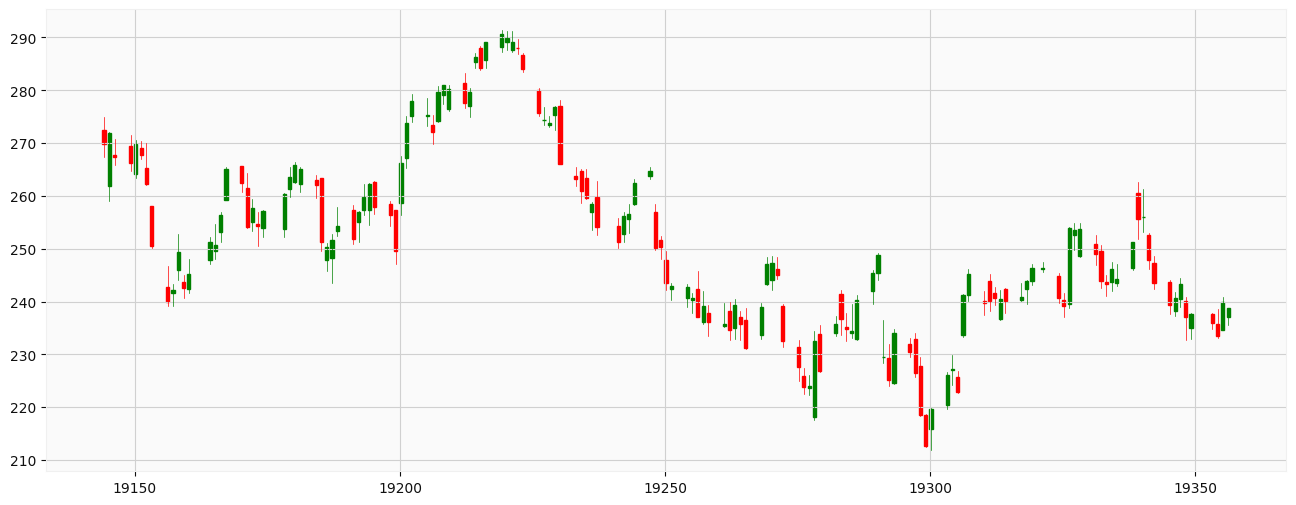

In [18]:
_, ax = plt.subplots(1, 1, figsize=(16, 6))
candlestick_ohlc(
    ax, 
    df_part.values,
    width=0.6, 
    colorup='g',
    colordown='r'
);

### plotly

In [5]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=df_part['Date'],
            open=df_part['Open'],
            high=df_part['High'],
            low=df_part['Low'],
            close=df_part['Close']
        )
    ]
)

fig.show()